In [1]:
import numpy as np
import torch
import gym
import torchvision.transforms
from collections import deque
from DQN_model import CnnDQN
from helper_functions import phi_transformer


class frame_saver:
    def __init__(self, save_path, 
                  img_dim, 
                  channels,
                  run_name,
                  n_frames_stack = 10**4):
        self.save_path = save_path
        self.frame_stack = deque([])
        self.n_stacks = 1
        self.n_frames_stack = n_frames_stack
        self.run_name = run_name
        
        if (channels == 1):
            self.process = torchvision.transforms.Compose(
                [torchvision.transforms.ToPILImage(),
                 torchvision.transforms.Grayscale(num_output_channels=channels),
                 torchvision.transforms.Resize(img_dim),
                 torchvision.transforms.ToTensor()])
        elif (channels == 3):
            self.process = torchvision.transforms.Compose(
                [torchvision.transforms.ToPILImage(),
                 torchvision.transforms.Resize(img_dim),
                 torchvision.transforms.ToTensor()])
        
    def add_frame(self, S):
        # Add frame
        S_processed = self.process(S).numpy()
        S_processed = np.transpose(S_processed, (1,2,0))
        S_processed = (255*S_processed).astype("uint8")
        self.frame_stack.append(S_processed)
        
        if ((len(self.frame_stack)+1) % (self.n_frames_stack+1) == 0):
            self.save_stack()
            
    def save_stack(self):
        # Save frames to disk
        name = self.save_path + "_" + self.run_name + "_" + str(self.n_stacks) +".npy"
        np.save(name, np.stack(self.frame_stack))
        self.frame_stack = deque() # Reset stack
        self.n_stacks += 1
        
    def end_gather(self):
        # Case where the number of frames has been sucessfully gathered, 
        #   and the last frames stored are to be saved
        if (self.frame_stack != deque()):
            self.save_stack()
        self.frame_stack = deque() # Reset stack
        

def gather_frames(frame_save, model, env, n_frames_gather, n_phi=4, epsilon=0.1):
    episode_reward = 0
    n_frames = 0
    
    done = False
    S = np.zeros((n_phi,) + (210,160,3), dtype="uint8")
    S[n_phi-1] = env.reset()
    
    while (n_frames_gather>n_frames):
        # Take action
        if np.random.rand(1)[0]<epsilon: # Case ranom move selected
                a = np.random.randint(env.action_space.n)
        else:
            with torch.no_grad():# Case non-random move selected greedely
                S_model = phi_transformer(S, n_phi)
                a = model.act(S_model)

        # Take actions
        for j in range(n_phi):
            S[j], r_temp, done, info = env.step(a)
            episode_reward += r_temp
            # Maybe add frame
            if (np.random.rand(1)[0]<add_frame_chance):
                frame_save.add_frame(S[j])
                n_frames += 1
            
            if (done): # Check if game done
                    print(episode_reward)
                    S = np.zeros((n_phi,) + (210,160,3), dtype="uint8")
                    done = False
                    S[n_phi-1] = env.reset()
                    episode_reward = 0
                    continue
                
    frame_save.end_gather()


# Hyper parameters
epsilon = 0.05 # Chance to do random action
add_frame_chance = 0.05
env_id = "Riverraid-v0"
n_phi = 4
n_frames_train_gather = 3*10**5 # Number of frames for training
n_frames_stack = 10**5 # Number of frames to store before writing



load_path = "models/DQN_"+env_id
save_path = "saved_frames/"+env_id

# Check if save directory exists
import os
if not os.path.exists('saved_frames'):
    os.makedirs('saved_frames')

env = gym.make(env_id)
Q_model = torch.load(load_path)
#Q_model = Q_model.eval()


frame_store_train = frame_saver(save_path, [64,64], 3, "train", n_frames_stack=n_frames_stack)
#frame_store_test = frame_saver(save_path, [64,64], 3, "test", n_frames_stack=50000)
#frame_store_val = frame_saver(save_path, [64,64], 3, "validation", n_frames_stack=50000)

## Begin train frame loop
gather_frames(frame_store_train, Q_model, env, n_frames_train_gather)
#gather_frames(frame_store_test, Q_model, env, 1000)
#gather_frames(frame_store_val, Q_model, env, 1000)


/home/rasmus/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


2870.0
5570.0
3170.0
3070.0
3190.0
2820.0
3180.0
3200.0
2940.0
2770.0
3920.0
3160.0
3610.0
3180.0
2720.0
3010.0
4880.0
5150.0
3350.0
2360.0
2900.0
3400.0
2910.0
2660.0
3170.0
3700.0
4260.0
2880.0
2510.0
3490.0
3540.0
3390.0
4110.0
3390.0
2690.0
3360.0
2950.0
2740.0
2450.0
2520.0
3120.0
3540.0
3000.0
3970.0
3230.0
2780.0
3720.0
2890.0
2590.0
3420.0
2400.0
3220.0
3380.0
3300.0
3040.0
3060.0
3670.0
3470.0
3750.0
2990.0
3930.0
3450.0
2490.0
2960.0
3050.0
2900.0
3290.0
3240.0
3140.0
2620.0
3210.0
2430.0
3330.0
4070.0
4080.0
2870.0
2640.0
2400.0
3500.0
3400.0
3000.0
3030.0
4150.0
3880.0
2520.0
3400.0
3280.0
3180.0
3310.0
3430.0
3470.0
2820.0
2970.0
3350.0
2600.0
2720.0
3360.0
4050.0
3520.0
2940.0
2860.0
3280.0
2930.0
3050.0
4040.0
3810.0
2520.0
2590.0
2520.0
3250.0
2540.0
3650.0
3490.0
3580.0
4080.0
2910.0
5300.0
2300.0
2420.0
3710.0
2510.0
3230.0
3280.0
3360.0
2710.0
2550.0
3540.0
3310.0
3020.0
3460.0
2970.0
3550.0
2610.0
3150.0
3160.0
3190.0
2730.0
2360.0
2720.0
3070.0
2950.0
3420.0
2880.0

In [ ]:
from skimage import io
img = io.imread("IODINE/data/RL_dataset/images/pic792.png")[:, :, :3]
import matplotlib.pyplot as plt

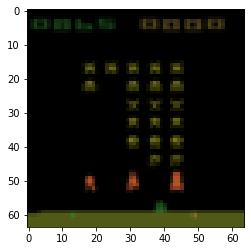

In [10]:
plt.imshow(img)